# **Logistic Regression for Binary Classification**

## Brief description of the Dataset

​The Credit Card Approval dataset from the UCI Machine Learning Repository contains data on credit card applications, with the aim of predicting whether an application is approved or denied. It comprises 690 instances, each described by 15 attributes and a target class label. The attributes include a mix of continuous and categorical variables, such as age, income, and credit history, with some missing values. The dataset is commonly used for classification tasks in machine learning, particularly for evaluating credit risk assessment models.​ The question we would like to explore here is: is there correlation between any of the features and the approval rate of credit cards? If so, can we make a logistic regression machine learning model to predict it?

* Features
   * Gender: Indicates the gender of the applicant (integer values, 0 for male, 1 for female).
   * Age: The age of the applicant (continuous numerical value).
   * Debt: The amount of debt the applicant currently holds (continuous numerical value).
   * Married: A binary indicator of whether the applicant is married (1 for married, 0 for not).
   * BankCustomer: A binary indicator of whether the applicant is a bank customer (1 for yes, 0 for no).
   * Industry: The industry in which the applicant is employed (categorical, e.g., Technology, Healthcare).
   * Ethnicity: The ethnic background of the applicant (categorical, e.g., Caucasian, African American).
   * YearsEmployed: The number of years the applicant has been employed (continuous numerical value).
   * PriorDefault: A binary indicator showing whether the applicant has had prior defaults (1 for yes, 0 for no).
   * Employed: A binary indicator of whether the applicant is employed (1 for yes, 0 for no).
   * CreditScore: The credit score of the applicant (integer value).
   * DriversLicense: A binary indicator of whether the applicant has a driver’s license (1 for yes, 0 for no).
   * Citizen: Indicates whether the applicant is a citizen (categorical, e.g., Citizen, Non-Citizen).
   * ZipCode: The zip code of the applicant (integer value).
   * Income: The income of the applicant (integer value).


* Label/Target

    * Approved - 0 if no pass, 1 if test passed

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

credit_card_approval_data = pd.read_csv("Creditcard_approval_cleaned.csv") #Read dataset in as a dataframe
credit_card_approval_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


## Exploratory Data Analysis 
1. How many `null` entries does the Dataset have?
2. What is the mean age of the participants in the study?
3. How old is the oldest participant?


In [12]:
# Display basic info
print("\n--- Dataset Info ---")
print(credit_card_approval_data.info())

# Check for missing values
print("\n--- Missing Values ---")
print(credit_card_approval_data.isnull().sum())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB

In [8]:
credit_card_approval_data.describe() #Finding mean, IQR, and max for all labels

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


1. There is 0 null/faulty entries in the dataset.
2. The mean age of the participants in the study is 31.51(rounded).
3. The oldest participant in the dataset is 80(rounded)

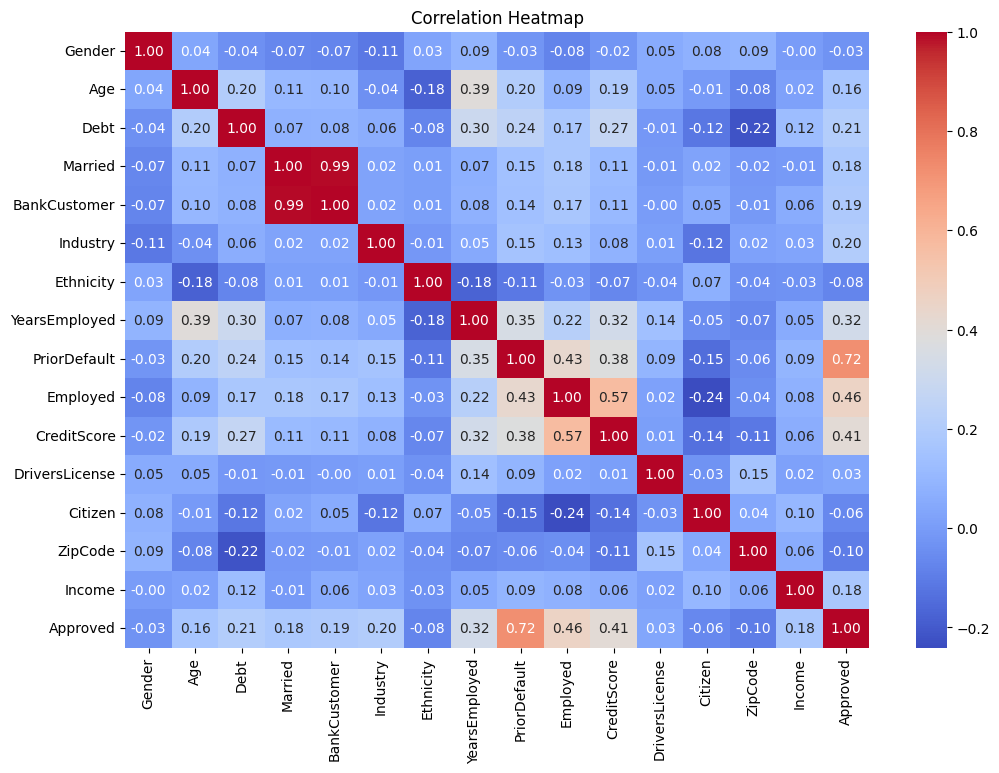

In [16]:
# Encode non-numeric categorical features with LabelEncoder
le = LabelEncoder()
for column in credit_card_approval_data.columns:
    if credit_card_approval_data[column].dtype == 'object':
        credit_card_approval_data[column] = le.fit_transform(credit_card_approval_data[column])

# Correlation heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(credit_card_approval_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

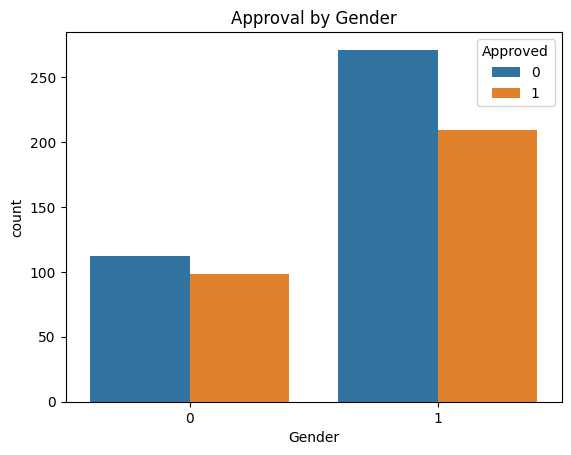

In [17]:
# Approval rate by Gender
sns.countplot(x="Gender", hue="Approved", data=credit_card_approval_data)
plt.title("Approval by Gender")
plt.show()

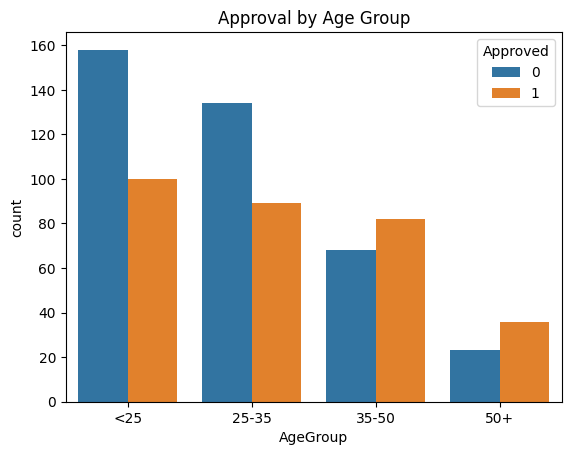

In [18]:
# Approval rate by Age group
credit_card_approval_data['AgeGroup'] = pd.cut(credit_card_approval_data['Age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])
sns.countplot(x="AgeGroup", hue="Approved", data=credit_card_approval_data)
plt.title("Approval by Age Group")
plt.show()

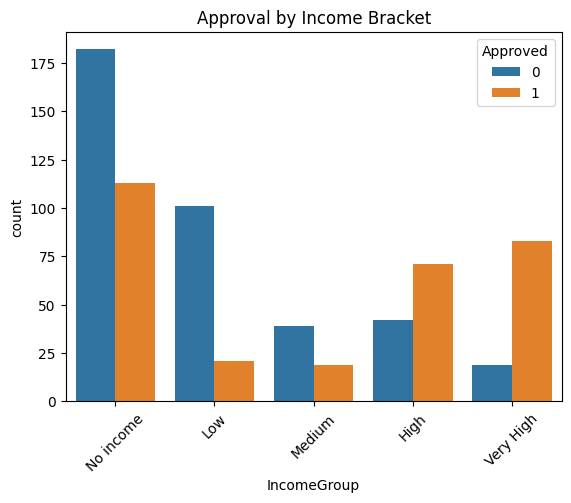

In [19]:
# Approval rate by Income bracket
credit_card_approval_data['IncomeGroup'] = pd.cut(credit_card_approval_data['Income'], bins=[-1, 0, 50, 200, 1000, np.inf], labels=['No income', 'Low', 'Medium', 'High', 'Very High'])
sns.countplot(x="IncomeGroup", hue="Approved", data=credit_card_approval_data)
plt.title("Approval by Income Bracket")
plt.xticks(rotation=45)
plt.show()


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        68
           1       0.83      0.86      0.85        70

    accuracy                           0.84       138
   macro avg       0.84      0.84      0.84       138
weighted avg       0.84      0.84      0.84       138


--- Confusion Matrix ---
[[56 12]
 [10 60]]


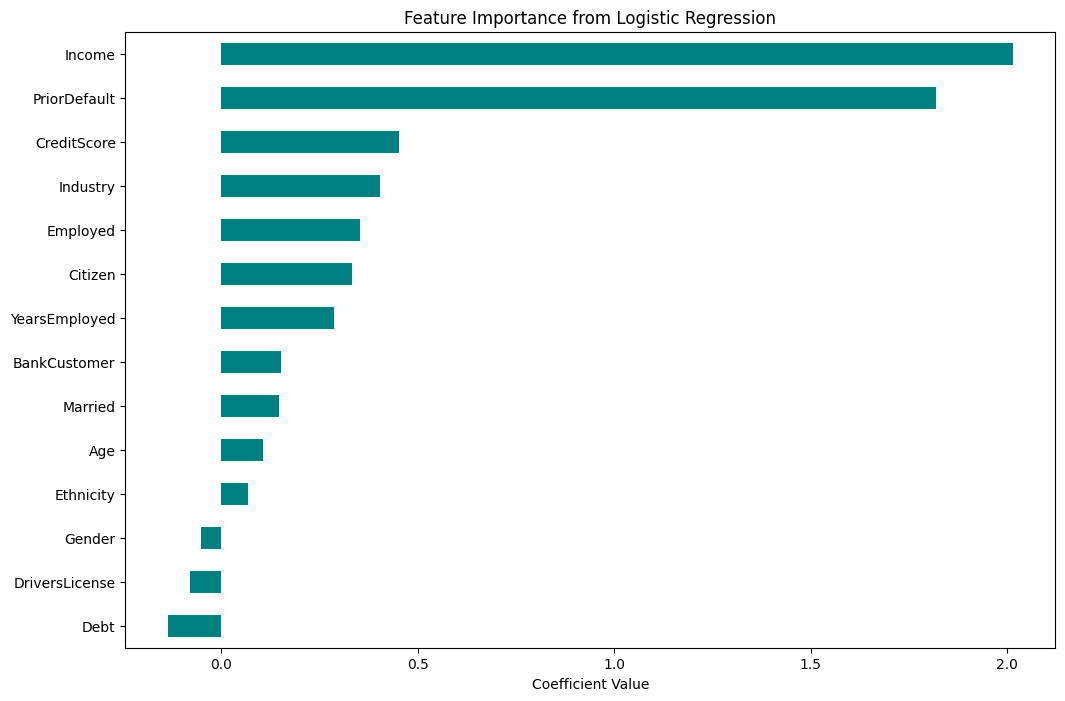

In [21]:
# Drop non-numeric or derived features before modeling
credit_card_approval_data_model = credit_card_approval_data.drop(columns=['ZipCode', 'AgeGroup', 'IncomeGroup'])

# Features and target
X = credit_card_approval_data_model.drop("Approved", axis=1)
y = credit_card_approval_data_model["Approved"]

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

# Feature importance
coefficients = pd.Series(model.coef_[0], index=X.columns)
sorted_coef = coefficients.sort_values()

plt.figure(figsize=(12, 8))
sorted_coef.plot(kind='barh', color='teal')
plt.title("Feature Importance from Logistic Regression")
plt.xlabel("Coefficient Value")
plt.show()

# Analysis:
1. Which features have the strongest correlation with credit card approval?
From the logistic regression coefficients plot, the top positively correlated features with approval include: PriorDefault (positive coefficient),CreditScore,Employed.Negatively correlated features include: Debt,Income (likely due to skew or zero-inflated values), DriversLicense (surprisingly negative—may reflect proxy bias)

2. How does age affect approval rates?
The approval rate is highest in the 25–35 and 35–50 age groups, and lowest in the <25 group, based on the AgeGroup visualization.

3. Does income level impact credit approval?
Yes. The approval rate increases with income, but people with no income or in the low bracket are far less likely to be approved. However, extremely high incomes don't guarantee approval either—indicating diminishing returns or nonlinear effects.

4. Are there differences in approval based on gender?
The count plot shows slightly higher approval for males (Gender = 1), but the difference is relatively small—though this could warrant further fairness/bias analysis.

# Summary:
This analysis examined demographic and financial factors influencing credit card approval using a cleaned dataset and a logistic regression model. The most significant predictors of approval included a clean credit history (no prior defaults), current employment status, and a strong credit score. Conversely, applicants who were younger, had lower income levels, or carried higher debt were less likely to receive approval. While the logistic regression model offered valuable insights and interpretability, it serves as a solid foundation that could be further enhanced with more advanced modeling techniques.